# Combination of SpSn of different Modalities 

Definitions:
$$C = \{Consesus\ decision = involved\}$$
$$X = \{True\ involvement = involved\}$$
$$A_i = \{modality\ i = involved\}$$
$$D = \{possible\ diagnoses\}$$

$$P(C \mid X)$$

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [54]:
spsnA = [0.66,0.73]
spsnB = [0.83, 0.75]
spsnC = [0.7, 0.84]
spsns = [spsnA, spsnB,spsnC]

In [55]:
def consensus_spsn(spsns):
    possible_D = list(itertools.product([0,1], repeat=len(spsns)))
    p_D_X = np.ones(shape=(len(possible_D),))
    p_D_nX = np.ones(shape=(len(possible_D),))
    p_decision = np.full(shape=(len(possible_D),), fill_value= -1)
    for k, inv in enumerate(possible_D):
        for i, spsn in enumerate(spsns):
            p_Ai_X = spsn[1] if inv[i] else (1-spsn[1])
            p_Ai_nX = (1-spsn[0]) if inv[i] else spsn[0]
            p_D_X[k] *= p_Ai_X
            p_D_nX[k] *= p_Ai_nX

    p_decision = (p_D_X - p_D_nX)        
    print(p_D_X)
    print(p_D_nX)
    print(p_decision)
    p_C_X = 0
    p_C_nX = 0
    for i, pD in enumerate(p_decision):
        if (pD >= 0):
            p_C_X += p_D_X[i]
        if (pD < 0):
            p_C_nX += p_D_nX[i]
    print(p_C_X)
    print(p_C_nX)
    
consensus_spsn(spsns)

possible_D = list(itertools.product([0,1], repeat=len(spsns)))
p_D_X = np.ones(shape=(len(possible_D),))
p_D_nX = np.ones(shape=(len(possible_D),))
p_decision = np.full(shape=(len(possible_D),), fill_value= -1)
for k, inv in enumerate(possible_D):
    for i, spsn in enumerate(spsns):
        p_Ai_X = spsn[1] if inv[i] else (1-spsn[1])
        p_Ai_nX = (1-spsn[0]) if inv[i] else spsn[0]
        p_D_X[k] *= p_Ai_X
        p_D_nX[k] *= p_Ai_nX

p_decision = (p_D_X - p_D_nX)        
p_C_X = 0
p_C_nX = 0
for i, pD in enumerate(p_decision):
    if (pD >= 0):
        p_C_X += p_D_X[i]
    if (pD < 0):
        p_C_nX += p_D_nX[i]



possible_D_names = [f"{d}" for d in possible_D]

[0.0108 0.0567 0.0324 0.1701 0.0292 0.1533 0.0876 0.4599]
[0.38346 0.16434 0.07854 0.03366 0.19754 0.08466 0.04046 0.01734]
[-0.37266 -0.10764 -0.04614  0.13644 -0.16834  0.06864  0.04714  0.44256]
0.8709
0.82388


[0.0108 0.0567 0.0324 0.1701 0.0292 0.1533 0.0876 0.4599]


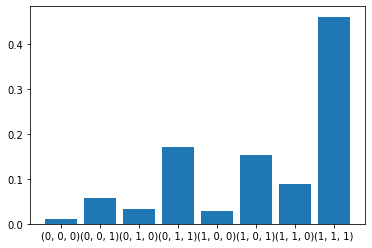

In [56]:
plt.bar(possible_D_names, p_D_X)
print(p_D_X)

[0.38346 0.16434 0.07854 0.03366 0.19754 0.08466 0.04046 0.01734]


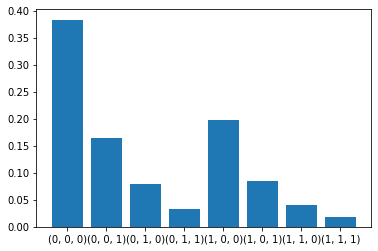

In [57]:
plt.bar(possible_D_names, p_D_nX)
print(p_D_nX)

[-0.37266 -0.10764 -0.04614  0.13644 -0.16834  0.06864  0.04714  0.44256]


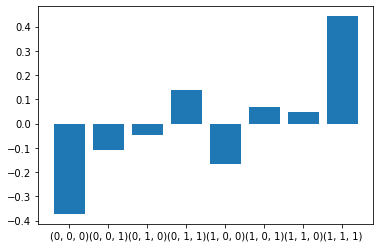

In [58]:
plt.bar(possible_D_names, p_decision)
print(p_decision)

In [59]:
### Simulated Sensitivity